#  What is the most optimal skill to learn for Data Analysts?

## Methodology

1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. Determine if certain technologies are more prevalent

# Import Libraries and Data

In [1]:
# Importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset
df = pd.read_csv(r'C:\Users\ARJUN\Python_projects\Python_Course\data_jobs.csv')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Clean Data

Filters the original dataset to only get rows where the job title is **'Data Analyst'** and the country is **'India'**, to create a new DataFrame **'df_DA_IND'**. Drop NaN values from the **'salary_year_avg'** column. Then it uses the explode method on the **'job_skills'** column to create a new row in a new DataFrame **'df_DA_US_exploded'** for each skill associated with a job. Finally, it displays the first 5 entries of the **'salary_year_avg'** and **'job_skills columns'**.

In [2]:
df_DA_IND = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_IND = df_DA_IND.dropna(subset = ['salary_year_avg'])

df_DA_IND_exploded = df_DA_IND.explode('job_skills')

df_DA_IND_exploded[['salary_year_avg', 'job_skills']].head()

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


# Calculate Percent of Job Postings that Have Skills

Group the data by job skills and calculate the count and median salary for each skill, sorting the results in descending order by count. It then renames the columns. Calculates the percentage that each skill count represents out of the total number of Data Analyst jobs. Finally, filter out any skills that don't have any jobs associated with them.

In [3]:
# using df_DA_IND_exploded find the count of skills and also the median salary for each skill

df_DA_skills = df_DA_IND_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False)
df_DA_skills = df_DA_skills.rename(columns = {'count': 'skill_count', 'median': 'median_salary'})
DA_job_count = len(df_DA_IND) # Find count of Data Analyst jobs in India with salary info
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100
df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]
df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.0,48.936170
excel,39,98500.0,41.489362
python,36,96050.0,38.297872
tableau,20,108087.5,21.276596
r,18,79200.0,19.148936
...,...,...,...
postgresql,1,165000.0,1.063830
ms access,1,64600.0,1.063830
mysql,1,165000.0,1.063830


# Median Salary vs Percent Skill Demand

Filters for Data Analyst skills that exceed a certain percentage **(skill_limit)**.

In [4]:
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.00,48.936170
excel,39,98500.00,41.489362
python,36,96050.00,38.297872
tableau,20,108087.50,21.276596
r,18,79200.00,19.148936
power bi,17,111175.00,18.085106
azure,15,93600.00,15.957447
aws,12,79200.00,12.765957
oracle,11,79200.00,11.702128


Create a scatter plot to visualize the relationship between the percentage of Data Analyst jobs that require specific skills and the median salary for those skills.

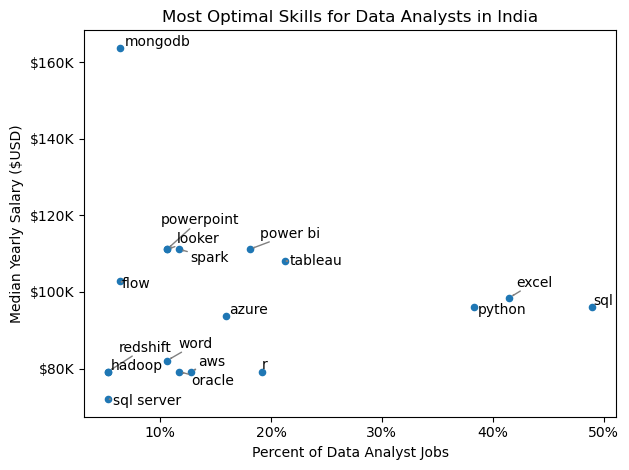

In [5]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_DA_skills_high_demand.plot(kind = 'scatter', x = 'skill_percent', y = 'median_salary')
plt.title('Most Optimal Skills for Data Analysts in India')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')

# formatting y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# formatting x-axis
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals = 0))

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# adjust text to avoid overlap
adjust_text(texts, arrowprops = dict(arrowstyle = '->', color = 'gray', lw = 1))

plt.tight_layout()
plt.show()

# Insights
1. MongoDB commands the highest median salary: Among the listed skills, MongoDB offers the highest compensation for data analysts in India.
2. PowerPoint, Power BI, and Looker are well-paid and in demand: These skills are clustered in the high-salary, high-demand quadrant, indicating they are both valuable and well-compensated.
3. Spark and Tableau are also valuable: While not as high-paying as the previous group, Spark and Tableau are still considered valuable skills, especially given their high demand.
4. Excel remains a fundamental skill: Despite its relatively lower salary, Excel is still a highly in-demand skill, reflecting its essential role in data analysis.
5. Cloud technologies are important: Skills related to cloud platforms like AWS, Azure, and Hadoop are in demand, reflecting the growing importance of cloud computing in the field.
6. SQL is a core skill but may not be the highest-paid: SQL is still a fundamental skill, but it may not offer the same level of compensation as some of the other skills listed, especially those related to specialized databases or advanced analytics tools.

# Coloring by Technology

We're going to add color labels based on technology.

Removes duplicate entries and any rows with missing values. Then, it combines all dictionary entries into a single dictionary, summing values for keys that repeat across entries. To ensure each key's values are unique, it converts the values to a set and then back to a list. The final result is a dictionary where each key represents a skill and each value is a list of unique attributes associated with that skill.

In [6]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) # converting string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value # if key already exists in technology_dict, add value to existing value
        else:
            technology_dict[key] = value # if key does not exist in technology_dict, add key and value
            
# remove duplicates by converting to set and then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))
    
technology_dict

{'analyst_tools': ['sap',
  'excel',
  'dax',
  'msaccess',
  'power bi',
  'word',
  'esquisse',
  'ssis',
  'looker',
  'splunk',
  'ssrs',
  'sas',
  'qlik',
  'microstrategy',
  'sheets',
  'tableau',
  'spreadsheet',
  'nuix',
  'sharepoint',
  'visio',
  'powerpoint',
  'alteryx',
  'spss',
  'outlook',
  'ms access',
  'datarobot',
  'cognos',
  'powerbi'],
 'programming': ['typescript',
  'html',
  'sql',
  'c',
  'java',
  'f#',
  'mongodb',
  'go',
  'php',
  'objective-c',
  'ocaml',
  'rust',
  'nosql',
  'apl',
  'shell',
  'kotlin',
  'clojure',
  'julia',
  'no-sql',
  'sas',
  'r',
  'bash',
  'visualbasic',
  'matlab',
  'crystal',
  'elixir',
  'scala',
  'mongo',
  'python',
  'vba',
  'sass',
  'powershell',
  'c++',
  'lua',
  'pascal',
  't-sql',
  'css',
  'vb.net',
  'visual basic',
  'fortran',
  'solidity',
  'erlang',
  'dart',
  'perl',
  'assembly',
  'ruby',
  'lisp',
  'cobol',
  'c#',
  'groovy',
  'javascript',
  'delphi',
  'swift',
  'golang',
  'hask

This code converts a dictionary into a pandas DataFrame, then explodes the **'skills'** column, creating multiple rows for each **'technology'** entry if it contains multiple skills.

In [7]:
# converting the dictionary into a DataFrame
df_technology = pd.DataFrame(list(technology_dict.items()), columns = ['technology', 'skills'])
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,sap
0,analyst_tools,excel
0,analyst_tools,dax
0,analyst_tools,msaccess
0,analyst_tools,power bi
...,...,...
9,sync,twilio
9,sync,unify
9,sync,zoom
9,sync,mattermost


In [8]:
# merge df_DA_skills and df_technology
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on = 'job_skills', right_on = 'skills')
df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,46,96050.00,48.936170,programming,sql
1,39,98500.00,41.489362,analyst_tools,excel
2,36,96050.00,38.297872,programming,python
3,20,108087.50,21.276596,analyst_tools,tableau
4,18,79200.00,19.148936,programming,r
5,17,111175.00,18.085106,analyst_tools,power bi
6,15,93600.00,15.957447,cloud,azure
7,12,79200.00,12.765957,cloud,aws
8,11,79200.00,11.702128,cloud,oracle
9,11,111175.00,11.702128,libraries,spark


Plot the results in a scatter plot, coloring the points based on the 'technology' column.

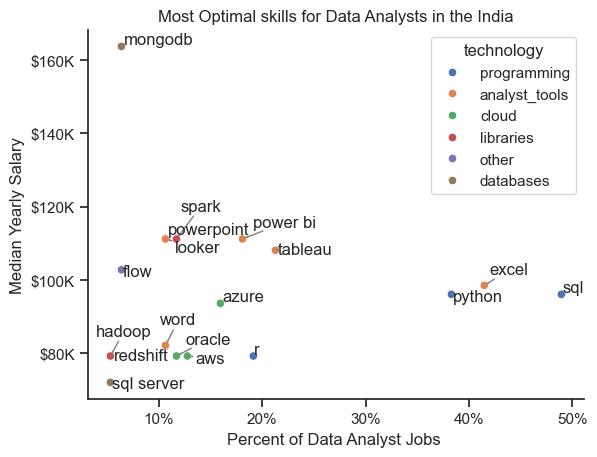

In [9]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

sns.set_theme(style = 'ticks')
sns.scatterplot(data = df_plot, x = 'skill_percent', y = 'median_salary', hue = 'technology')
sns.despine()

# set axis labels, title and legend
plt.title('Most Optimal skills for Data Analysts in the India')
plt.xlabel('Percent of Data Analyst Jobs ')
plt.ylabel('Median Yearly Salary')

# formatting y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# formatting x-axis
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals = 0))

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# adjust text to avoid overlap
adjust_text(texts, arrowprops = dict(arrowstyle = '->', color = 'gray', lw = 1))

plt.show()

# Insights
1. MongoDB is highly valued: Among the listed skills, MongoDB stands out as the most optimal, offering both high salary and demand.
2. Business intelligence tools are in demand: PowerPoint, Power BI, and Looker are clustered in the high-salary, high-demand quadrant, indicating their value and popularity.
3. Data visualization is essential: Tableau and Spark, both related to data visualization, are also highly valued.
4. Excel remains a fundamental skill: Despite its lower salary, Excel's widespread use makes it a crucial skill for data analysts.
5. Cloud technologies are important: Skills like AWS, Azure, and Hadoop are in demand, reflecting the growing importance of cloud computing in data analysis.
6. SQL is a core skill but may not be the highest-paid: While SQL is essential, it may not offer the same level of compensation as some specialized skills.